# Домашнее задание №2

Задание присылать на почту **aleksartmonov@gmail.com** в форматах *.ipynb* и отрендеренный результат в *.html*

В теме письма указать **AU2018 HW2 <Фамилия Имя>**

soft deadline: 04.03.2018T23:59:00+0300

hard deadline: 11.03.2018T23:59:00+0300

In [1]:
import numpy as np

In [2]:
from ipywidgets import interact
import ipywidgets as widgets

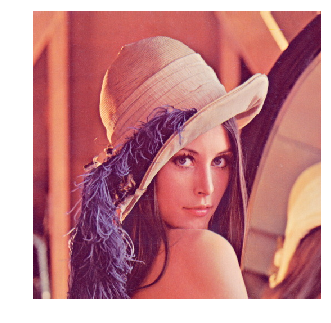

In [3]:
import cv2
import matplotlib.pylab as plt
%matplotlib inline

def show(img):
    ax = plt.axes([0,0,1,1], frameon=False)
    ax.set_axis_off()
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

lena = cv2.imread("lena.jpg")
show(lena)

**1. (6 баллов)** С помощью [виджетов](http://ipywidgets.readthedocs.io/en/latest/examples/Widget%20List.html) создайте 2 слайдера с настройками параметров гамма-коррекции. Отобразите **lena**, ее гамма-преобразование и график в диапозоне от [0;1], так, чтобы параметры слайдера соответствовали параметрам гамма-коррекции. 

In [4]:
def gamma_f(image, c, gamma):
    corrected = c * ((image.astype("int64") /255) ** gamma) * 255
    corrected[corrected > 255] = 0  # you've told me to add this feature
    return np.array(corrected, dtype=np.uint8)

In [5]:
def tune_gamma(c, gamma):
    f, axs = plt.subplots(1, 3, figsize=(19,6))
    
    plt.subplot(1, 3, 1)
    plt.imshow(cv2.cvtColor(lena, cv2.COLOR_BGR2RGB));
    plt.axis('off');

    plt.subplot(1, 3, 2)
    plt.imshow(cv2.cvtColor(gamma_f(lena, c, gamma), cv2.COLOR_BGR2RGB));
    plt.axis('off');

    plt.subplot(1, 3, 3)
    x = np.linspace(0, 1, num=100)
    y = c * (x ** gamma)
    plt.plot(x, y);

In [6]:
interact(tune_gamma, 
         c=widgets.FloatSlider(min=0,max=3,value=1), 
         gamma=widgets.FloatSlider(min=0,max=1,value=0.1));

interactive(children=(FloatSlider(value=1.0, description='c', max=3.0), FloatSlider(value=0.1, description='gamma', max=1.0), Output()), _dom_classes=('widget-interact',))

**2. (3 балла)** Загрузите изображение $lena.jpg$. Переведите изображение в градации серого. Примените к серому изображению операцию линейного растяжения диапазона яркостей ($normalize$) и эквализации гистограммы ($equalizeHist$). Постройте разность полученных результатов. Состыкуйте в одно изображение в градациях серого результат линейного растяжения, эквализации и их разности.

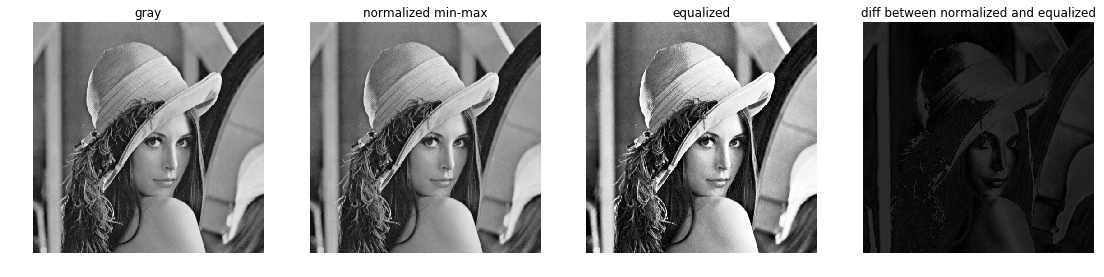

In [7]:
lena_gray = cv2.cvtColor(lena, cv2.COLOR_BGR2GRAY)

num_pictures = 4
f, axs = plt.subplots(1, num_pictures, figsize=(19,6))

plt.subplot(1, num_pictures, 1)
plt.imshow(lena_gray, cmap='gray');
plt.title('gray')
plt.axis('off');

lena_norm = cv2.normalize(lena_gray, dst=None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, 
                          dtype=cv2.CV_32F).astype(np.uint8)
plt.subplot(1, num_pictures, 2)
plt.imshow(lena_norm, cmap='gray');
plt.title('normalized min-max')
plt.axis('off');

lena_equalize = cv2.equalizeHist(lena_gray)
plt.subplot(1, num_pictures, 3)
plt.imshow(lena_equalize, cmap='gray');
plt.title('equalized')
plt.axis('off');

diff = np.abs(lena_norm.astype(int) - lena_equalize.astype(int)).astype(np.uint8)
plt.subplot(1, num_pictures, 4)
plt.imshow(diff, cmap='gray', vmin=0, vmax=255);
plt.title('diff between normalized and equalized')
plt.axis('off');

**3. (3 балла) ** Реализуйте функцию добавления шума «соль и перец» для одноканального изображения. Входные параметры: $src$ – исходная одноканальная матрица $Mat$, $p$ – вероятность замещения исходных значений на $0$, $q$ – вероятность замещения исходных значений на $255$. Загрузите изображение $lena.jpg$, выделите каналы изображения в отдельные матрицы ($split$), добавьте шум «соль и перец» в каждый канал при помощи реализованной Вами функции с параметрами

1. $p=q=0.05$
2. $p=q=0.1$
3. $p=q=0.15$

In [8]:
def salt_pepper(src, p, q):
    noise = np.random.choice([0, 255, -1], size=src.shape, p=[p, q, 1-(p+q)])
    
    res = src.copy()
    res[noise == 0] = 0
    res[noise == 255] = 255
    
    return res


def salt_pepper_multiChannel(img, p, q):
    return cv2.merge([salt_pepper(cv2.split(img)[i], p, q) for i in range(3)])

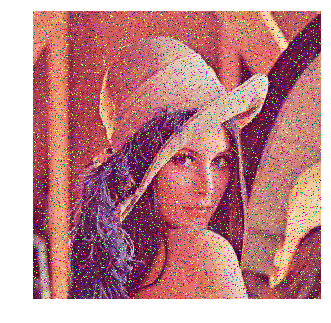

In [9]:
p = 0.05
q = 0.05
show(salt_pepper_multiChannel(lena, p, q))

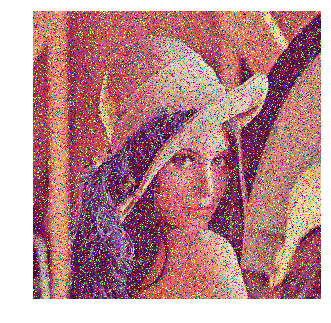

In [10]:
p = 0.1
q = 0.1
show(salt_pepper_multiChannel(lena, p, q))

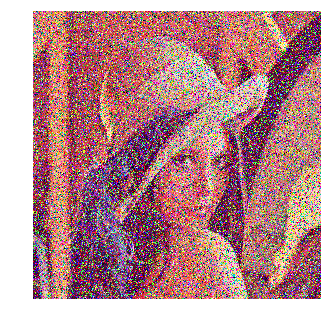

In [11]:
p = 0.15
q = 0.15
show(salt_pepper_multiChannel(lena, p, q))

**5. (6 баллов)** Загрузите изображение $lena.jpg$ (512х512). Переведите изображение в градации серого. 

Произведите фильтрацию данного изображения в частотной области идеальным фильтром низких частот (фильтр, обрезающий все высокочастотные составляющие Фурье-образа, находящиеся на большем расстоянии от начала координат, чем некоторое заданное расстояние $D$), 

идеальным фильтром высоких частот (фильтр, обрезающий все низкокочастотные составляющие Фурье-образа, находящиеся на меньшем расстоянии от начала координат, чем некоторое заданное расстояние $D$) 

со  значениями радиуса фильтров, которые будут задаваться с помощью слайдера, как в задании **1**.

Для каждого фильтра постройте состыкованное изображение из следующих: 

1) исходное изображение в градациях серого, 

2) изображение Фурье-спектра (после логарифмической коррекции для лучшей визуализации), 

3) изображение Фурье-спектра после фильтрации, 

4) изображение в пространственной области после фильтрации. 

Итого для каждого $D$ должно рисоваться 8 картинок. 

In [12]:
def ideal_pass_filter(D, pass_type):

    dft = np.fft.fft2(lena_gray)
    dft_shift = np.fft.fftshift(dft)
    magnitude_spectrum = np.log(np.abs(dft_shift))

    crow, ccol = lena_gray.shape[0]//2 , lena_gray.shape[1]//2     # center
    mask = np.zeros_like(dft_shift)
    for x in range(lena_gray.shape[0]):
        for y in range(lena_gray.shape[1]):
            dist = ((x-crow)**2 + (y-ccol)**2) **(0.5)
            if pass_type == "high" and dist >= D:
                mask[x, y] = 1
            if pass_type == "low" and dist <= D:
                mask[x, y] = 1

    fshift = dft_shift * mask

    with np.warnings.catch_warnings():
        np.warnings.filterwarnings('ignore', r'divide by zero encountered in log')
        magnitude_spectrum_2 = np.log(np.abs(fshift))

    f_ishift = np.fft.ifftshift(fshift)
    img_back = np.fft.ifft2(f_ishift)
    img_back = np.abs(img_back)

    num_pictures = 4
    f, axs = plt.subplots(1, num_pictures, figsize=(19,6))

    plt.subplot(1, num_pictures, 1)
    plt.imshow(lena_gray, cmap = 'gray')
    plt.title('Input Image')
    plt.axis('off');

    plt.subplot(1, num_pictures, 2)
    plt.imshow(magnitude_spectrum, cmap = 'gray')
    plt.title('Magnitude Spectrum')
    plt.axis('off');

    plt.subplot(1, num_pictures, 3)
    plt.imshow(magnitude_spectrum_2, cmap = 'gray')
    plt.title('filtered Magnitude Spectrum')
    plt.axis('off');

    plt.subplot(1, num_pictures, 4)
    plt.imshow(img_back, cmap = 'gray')
    plt.title('filtered Image')
    plt.axis('off');

In [13]:
interact(ideal_pass_filter, 
         D=widgets.IntSlider(min=0,max=256,value=50), pass_type="high");

interactive(children=(IntSlider(value=50, description='D', max=256), Text(value='high', description='pass_type'), Output()), _dom_classes=('widget-interact',))

In [14]:
interact(ideal_pass_filter, 
         D=widgets.IntSlider(min=1,max=256,value=50), pass_type="low");

interactive(children=(IntSlider(value=50, description='D', max=256, min=1), Text(value='low', description='pass_type'), Output()), _dom_classes=('widget-interact',))

**6. (5 баллов) **Удалите диагональные полоски с изображения $lena\_diagonal.jpg$. Вычислите среднеквадратичную ошибку (mean squared error, $MSE$, \url{http://en.wikipedia.org/wiki/Mean_squared_error}) для полученного результата и изображения $lena\_gray\_512.tif$. Задача будет засчитана при $MSE < 1500$. Тот, у кого по результатам проверки будет наименьшее значение MSE среди всех студентов для этой задачи, получит призовую шоколадку (раньше мы раздавали призовые баллы, но теперь у нас концепция фиксированного максимального количества баллов)

In [15]:
from sklearn.metrics import mean_squared_error

def mse(img1, img2):
    return mean_squared_error(img1.astype("float64").flatten(),
                              img2.astype("float64").flatten())

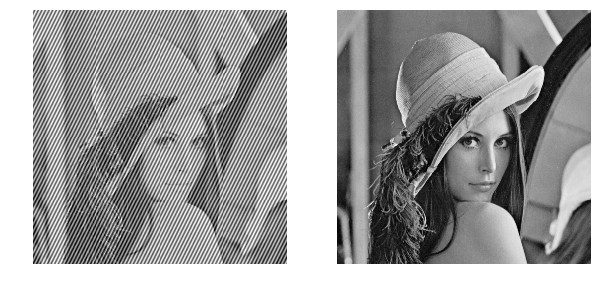

In [16]:
lena_diagonal = cv2.imread("lena_diagonal.jpg", cv2.IMREAD_GRAYSCALE)
lena_gray_true = cv2.imread("lena_gray_512.tif", cv2.IMREAD_GRAYSCALE)

num_pictures = 2
f, axs = plt.subplots(1, num_pictures, figsize=(10,5))
plt.subplot(1, num_pictures, 1)
plt.imshow(lena_diagonal, cmap = 'gray')
plt.axis('off');
plt.subplot(1, num_pictures, 2)
plt.imshow(lena_gray_true, cmap = 'gray')
plt.axis('off');

MSE: 899.97


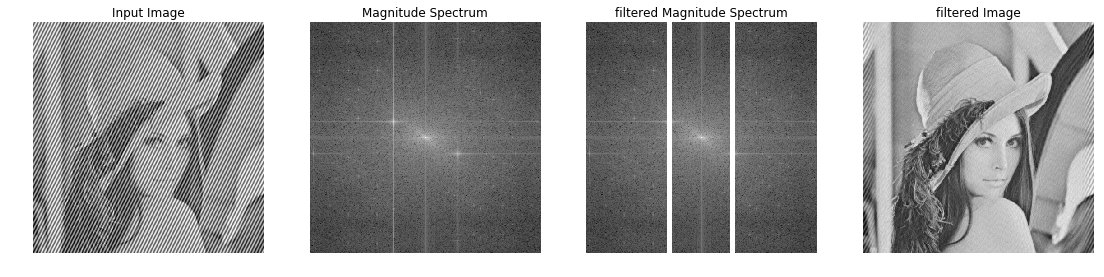

In [17]:
dft = np.fft.fft2(np.float32(lena_diagonal))
dft_shift = np.fft.fftshift(dft)
magnitude_spectrum = np.log(np.abs(dft_shift))

crow, ccol = lena_gray.shape[0]//2 , lena_gray.shape[1]//2     # center
mask = np.ones_like(dft_shift)
mask[:,180:190] = 0
mask[:,320:330] = 0

fshift = dft_shift * mask

with np.warnings.catch_warnings():
    np.warnings.filterwarnings('ignore', r'divide by zero encountered in log')
    magnitude_spectrum_2 = np.log(np.abs(fshift))

f_ishift = np.fft.ifftshift(fshift)
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)

num_pictures = 4
f, axs = plt.subplots(1, num_pictures, figsize=(19,6))

plt.subplot(1, num_pictures, 1)
plt.imshow(lena_diagonal, cmap = 'gray')
plt.title('Input Image')
plt.axis('off');

plt.subplot(1, num_pictures, 2)
plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum')
plt.axis('off');

plt.subplot(1, num_pictures, 3)
plt.imshow(magnitude_spectrum_2, cmap = 'gray')
plt.title('filtered Magnitude Spectrum')
plt.axis('off');

plt.subplot(1, num_pictures, 4)
plt.imshow(img_back, cmap = 'gray')
plt.title('filtered Image')
plt.axis('off');

print("MSE: %.2f" % mse(img_back, lena_gray_true))

**7. (5 баллов)** Подавите шум на изображении $lena\_color\_512\_noise.tif$. Вычислите среднеквадратичную ошибку ($MSE$) для полученного результата и изображения $lena\_color\_512.tif$. Задача будет засчитана при $MSE < 150$. Тот, у кого по результатам проверки будет наименьшее значение $MSE$ среди всех студентов для этой задачи, получит призовую шоколадку.

In [18]:
img_true = cv2.imread("lena_color_512.tif")

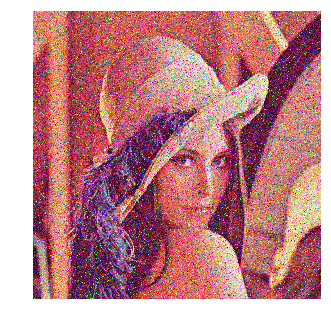

In [19]:
img_salt_pepper = cv2.imread("lena_color_512-noise.tif")
show(img_salt_pepper)

MSE: 117.05


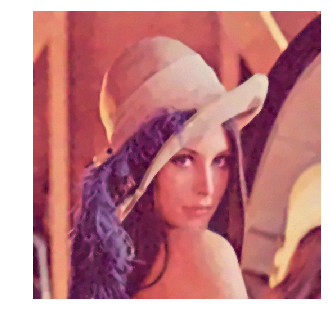

In [20]:
p = 0.048

img_salt_pepper_corrected = cv2.medianBlur(img_salt_pepper, 7)
img_salt_pepper_corrected = cv2.addWeighted(img_salt_pepper_corrected, 1-p, img_salt_pepper, p, 0)
img_salt_pepper_corrected = cv2.fastNlMeansDenoisingColored(img_salt_pepper_corrected, h=4, hColor=6)
img_salt_pepper_corrected = cv2.addWeighted(img_salt_pepper_corrected, 1-p, img_salt_pepper, p, 0)
img_salt_pepper_corrected = cv2.fastNlMeansDenoisingColored(img_salt_pepper_corrected, h=3, hColor=5)
img_salt_pepper_corrected = cv2.addWeighted(img_salt_pepper_corrected, 1-p, img_salt_pepper, p, 0)
show(img_salt_pepper_corrected)

print("MSE: %.2f" % mse(img_true, img_salt_pepper_corrected))

**8. (5 баллов)** Реализуйте функцию пространственной фильтрации изображения однородным усредняющим фильтром размера $n \times n$ (все коэффициенты маски равны $\frac{1}{n^2}$). При вычислении среднего используйте тот факт, что при переходе от точки к точке обновляется только часть элементов изображения под маской. Примените реализованный фильтр к предварительно переведенному в градации серого изображению $lena.jpg$ при $n = 3$ и $n = 5$. Постройте и сохраните изображение, представляющее собой разность полученных результатов фильтрации.

In [21]:
lena_gray = cv2.cvtColor(lena, cv2.COLOR_BGR2GRAY)

def mean_filter(k):
    k_2 = k // 2

    lena_gray_pad = np.pad(lena_gray, pad_width=k_2, mode="constant")

    res = np.zeros_like(lena_gray, dtype="float64")

    for x in range(lena_gray.shape[0]):
        for y in range(lena_gray.shape[1]):
            if y == 0:
                res[x, y] = lena_gray_pad[x:x+k, 0:k].sum()
            else:                    
                res[x, y] = res[x, y-1] - lena_gray_pad[x:x+k, y-1].sum() + lena_gray_pad[x:x+k, y+2*k_2].sum()
                
    res = res / (k*k)
                
    return np.array(res, dtype=np.uint8)

In [22]:
lena_mean_3 = mean_filter(3)
lena_mean_5 = mean_filter(5)
lena_mean_diff = np.abs(lena_mean_3.astype("int") - lena_mean_5.astype("int"))

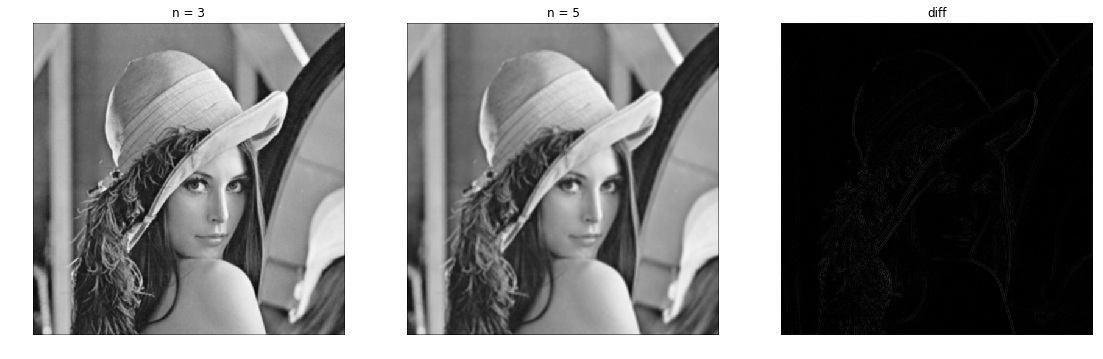

In [23]:
num_pictures = 3
f, axs = plt.subplots(1, num_pictures, figsize=(19,6))

plt.subplot(1, num_pictures, 1)
plt.imshow(lena_mean_3, cmap='gray');
plt.title('n = 3')
plt.axis('off');

plt.subplot(1, num_pictures, 2)
plt.imshow(lena_mean_5, cmap='gray');
plt.title('n = 5')
plt.axis('off');

plt.subplot(1, num_pictures, 3)
plt.imshow(lena_mean_diff, cmap='gray', vmin=0, vmax=255);
plt.title('diff')
plt.axis('off');

In [26]:
plt.imsave("lena_mean_diff.png", lena_mean_diff, cmap="gray", vmin=0, vmax=255)